# **Libraries**

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import random
random.seed(42)


# **Load Datasets**

In [12]:
df_full = pd.read_csv('..//data//processed_datasets//processed_datasets.csv')
df_full.head(5)

,date,purchase_price,selling_price,exchange_rate,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,...,weekofyear_cos,SMA_selling_price_7,SMA_selling_price_14,SMA_selling_price_31,Upper_Band_selling_price_20,Middle_Band_selling_price_20,Lower_Band_selling_price_20,purchase_sell_diff,converted_xauusd,domestic_world_diff
0,2020-02-01,44.20,44.85,23182.0,5,1,2,32,1,5,...,0.829406,44.378571,44.125000,43.787097,44.813729,43.8975,42.981271,0.65,36.850346,7.999654
1,2020-02-02,44.20,44.95,23182.0,6,1,2,33,2,5,...,0.829406,44.514286,44.235714,43.856452,44.965161,43.9775,42.989839,0.75,36.852689,8.097311
2,2020-02-03,43.80,44.60,23182.0,0,1,2,34,3,6,...,0.757511,44.578571,44.289286,43.908065,45.014238,44.0425,43.070762,0.80,36.587221,8.012779
3,2020-02-04,43.65,44.15,23182.0,1,1,2,35,4,6,...,0.757511,44.564286,44.296429,43.935484,45.006499,44.0800,43.153501,0.50,36.021095,8.128905
4,2020-02-05,43.25,43.75,23237.0,2,1,2,36,5,6,...,0.757511,44.500000,44.292857,43.950000,44.978635,44.1000,43.221365,0.50,36.154602,7.595398


In [13]:
# Reset index
df_full['date'] = pd.to_datetime(df_full['date'])
df_full = df_full.set_index("date")
df_full = df_full.asfreq('D')
df_full = df_full.sort_index()
df_full.head(5)

,purchase_price,selling_price,exchange_rate,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,dayofweek_sin,...,weekofyear_cos,SMA_selling_price_7,SMA_selling_price_14,SMA_selling_price_31,Upper_Band_selling_price_20,Middle_Band_selling_price_20,Lower_Band_selling_price_20,purchase_sell_diff,converted_xauusd,domestic_world_diff
date,,,,,,,,,,,,,,,,,,,,,
2020-02-01,44.20,44.85,23182.0,5,1,2,32,1,5,-8.660254e-01,...,0.829406,44.378571,44.125000,43.787097,44.813729,43.8975,42.981271,0.65,36.850346,7.999654
2020-02-02,44.20,44.95,23182.0,6,1,2,33,2,5,-2.449294e-16,...,0.829406,44.514286,44.235714,43.856452,44.965161,43.9775,42.989839,0.75,36.852689,8.097311
2020-02-03,43.80,44.60,23182.0,0,1,2,34,3,6,0.000000e+00,...,0.757511,44.578571,44.289286,43.908065,45.014238,44.0425,43.070762,0.80,36.587221,8.012779
2020-02-04,43.65,44.15,23182.0,1,1,2,35,4,6,8.660254e-01,...,0.757511,44.564286,44.296429,43.935484,45.006499,44.0800,43.153501,0.50,36.021095,8.128905
2020-02-05,43.25,43.75,23237.0,2,1,2,36,5,6,8.660254e-01,...,0.757511,44.500000,44.292857,43.950000,44.978635,44.1000,43.221365,0.50,36.154602,7.595398


In [14]:
# Because it is tree based algorithm,we won't use cyclical encoding
cyclical_encoding_columns = [
  'dayofweek_sin',
  'dayofweek_cos',
  'quarter_sin',
  'quarter_cos',
  'month_sin',
  'month_cos',
  'dayofyear_sin',
  'dayofyear_cos',
  'dayofmonth_sin',
  'dayofmonth_cos',
  'weekofyear_sin',
  'weekofyear_cos'
]

# Drop columns
df_full = df_full.drop(cyclical_encoding_columns, axis=1)
df_full.head(5)

,purchase_price,selling_price,exchange_rate,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,SMA_selling_price_7,SMA_selling_price_14,SMA_selling_price_31,Upper_Band_selling_price_20,Middle_Band_selling_price_20,Lower_Band_selling_price_20,purchase_sell_diff,converted_xauusd,domestic_world_diff
date,,,,,,,,,,,,,,,,,,
2020-02-01,44.20,44.85,23182.0,5,1,2,32,1,5,44.378571,44.125000,43.787097,44.813729,43.8975,42.981271,0.65,36.850346,7.999654
2020-02-02,44.20,44.95,23182.0,6,1,2,33,2,5,44.514286,44.235714,43.856452,44.965161,43.9775,42.989839,0.75,36.852689,8.097311
2020-02-03,43.80,44.60,23182.0,0,1,2,34,3,6,44.578571,44.289286,43.908065,45.014238,44.0425,43.070762,0.80,36.587221,8.012779
2020-02-04,43.65,44.15,23182.0,1,1,2,35,4,6,44.564286,44.296429,43.935484,45.006499,44.0800,43.153501,0.50,36.021095,8.128905
2020-02-05,43.25,43.75,23237.0,2,1,2,36,5,6,44.500000,44.292857,43.950000,44.978635,44.1000,43.221365,0.50,36.154602,7.595398


In [15]:
# List of columns 
df_full.columns.tolist()

['purchase_price',
 'selling_price',
 'exchange_rate',
 'dayofweek',
 'quarter',
 'month',
 'dayofyear',
 'dayofmonth',
 'weekofyear',
 'SMA_selling_price_7',
 'SMA_selling_price_14',
 'SMA_selling_price_31',
 'Upper_Band_selling_price_20',
 'Middle_Band_selling_price_20',
 'Lower_Band_selling_price_20',
 'purchase_sell_diff',
 'converted_xauusd',
 'domestic_world_diff']

# **dataloader**

In [16]:
def create_xy_multiple_input_single_output(
    df,
    target_column,
    exog_columns,
    window_size,
    prediction_horizon,
    flatten=False,
    return_shape=False
    ):
  
    """
    Transform time series data into supervised tasks with input-output pairs.

    Parameters:
      - df (pandas.DataFrame): The DataFrame containing the time series data.
      - target_column (str): The name of the target column for prediction.
      - exog_columns (list): A list of column names representing exogenous variables.
      - window_size (int): The size of the lookback window (past observations) to create inputs in input-output pairs 
      - prediction_horizon (int): The number of steps ahead to predict.
      - flatten (bool, optional): Whether to flatten the inputs of the input-output pairs created (default is False).
      - return_shape (bool, optional): Whether to print and return the shapes of input and output arrays (default is False).

    Returns:
      - tuple or None: A tuple containing input data and corresponding output data if flatten is False, 
                   otherwise, flattened input data and output data. If return_shape is True, 
                   prints and returns the shapes of input and output arrays in input-output pairs.
    """

    exog_vars = df[exog_columns]

    x = []
    y = []
    for i in range(0, len(df) - window_size - prediction_horizon + 1):
        x_window = df.iloc[i:(i + window_size)][target_column].values
        exog_window = exog_vars.iloc[i:(i + window_size)].values  # Extract the corresponding exogenous window
        # Reshape x_window to have 2 dimensions
        x_window = np.atleast_2d(x_window).T
        # Stack the exogenous variable horizontally
        x_window = np.hstack((x_window, exog_window))
        x.append(x_window)
        y.append(df.iloc[(i + window_size):(i + window_size + prediction_horizon)][target_column].values)

    x = np.array(x)
    y = np.array(y)

    if flatten:
      n_input = x.shape[1] * x.shape[2]
      x_flattened = x.reshape((x.shape[0], n_input))

      if return_shape:
        print(f'x shape: {x_flattened.shape}')
        print(f'y shape: {y.shape}')

      return x_flattened, y

    else:
      if return_shape:
        print(f'x shape: {x.shape}')
        print(f'y shape: {y.shape}')

      return x, y

In [17]:
# # test
# # Generate some sample data
# np.random.seed(42)
# date_range = pd.date_range(start='2022-01-01', end='2022-03-31')
# df = pd.DataFrame({
#     'date': date_range,
#     'target': np.random.randint(0, 100, len(date_range)),
#     'exog_feature1': np.random.randint(0, 100, len(date_range)),
#     'exog_feature2': np.random.randint(0, 100, len(date_range))
# })
# df.head(10)

In [18]:
# # test
# target_column = 'target'
# exog_columns = ['exog_feature1', 'exog_feature2']
# window_size = 5
# prediction_horizon = 1

# # Create X, y using create_xy_multiple_input_single_output
# X, y = create_xy_multiple_input_single_output(df, target_column, exog_columns, window_size, prediction_horizon, True)
# print(X[0])
# print(y[0])
# print(X[1])
# print(y[1])

In [19]:
# # test 
# # Feature names list 
# lst_col = []
# lst_col.append(target_column)
# lst_col = lst_col + exog_columns

# feature_name_list = []
# for i in range(window_size, 0, -1):
#     feature_name_list += [f'{col}_lag_{str(i)}' for col in lst_col]
    
# feature_name_list

In [20]:
def create_single_fold(train_set, n_fold, ith_fold, test_size, lookback_window):
  
    """
    Create subsets of data including three dataframes including the subsets for training, evaluating, and lookback values used for making predictions into the future 
    
    Parameters:
      - train_set (pd.DataFrame): The input dataframe from which subsets will be created
      - n_fold (int): A total number of subsets to be created 
      - ith_fold (int): A current index of subset in n_fold 
      - test_size (int): The number of steps ahead to predict (also the size of evaluation set in each subset)
      - lookback_window (int): The size of the lookback window (past observations) to include
    
    Returns:
        - tuple: A tuple contains three dataframes including the subsets for training, evaluating, and lookback values used for making predictions into the future 
    """

    # Calculate the start and end indices for the test set of the current fold
    start_test_idx = - test_size * (n_fold - ith_fold + 1)
    end_test_idx = start_test_idx + test_size
    lookback_test_idx = start_test_idx - lookback_window

    # Extract the train set for the current fold (excluding the test set)
    fold_train_set = train_set.iloc[:start_test_idx]

    # Extract the test set for the current fold
    if ith_fold == n_fold:
      fold_test_set = train_set.iloc[start_test_idx:]
      fold_test_lookback = train_set.iloc[lookback_test_idx:] # create a subset containing past observations used as inputs for making predictions into the future 
    else:
      fold_test_lookback = train_set.iloc[lookback_test_idx:end_test_idx]
      fold_test_set = train_set.iloc[start_test_idx:end_test_idx]


    return fold_train_set, fold_test_set, fold_test_lookback

# **modelling**

In [21]:
def calculate_forecast_bias(pred_series, actual_series):
    """ 
    Forecast Bias (FB)

    Parameters
        - actual_series (pd.Series): The time series of actual values  
        - pred_series (pd.Series): The time series of predicted values.

    Returns
        - float: The Forecast Bias 
    """
    
    y_true, y_pred = actual_series, pred_series
    
    y_true_sum, y_pred_sum = np.sum(y_true), np.sum(y_pred)
    # raise_if_not(y_true_sum > 0, 'The series of actual value cannot sum to zero when computing OPE.', logger)
    return ((y_pred_sum - y_true_sum) / len(y_true))

In [22]:
def run_rfr_full(data_train, data_test, target_column, exog_column, window_size, horizon, rfr_params=None):
    """
    Run Random Forest Regression (RFR) model for time series forecasting.

    Parameters:
        - data_train (pandas.DataFrame): The DataFrame containing the training data.
        - data_test (pandas.DataFrame): The DataFrame containing the testing data.
        - target_column (str): The name of the target column for prediction.
        - exog_column (list): A list of column names representing exogenous variables.
        - window_size (int): The size of the lookback window (past observations) to create inputs in input-output pairs 
        - horizon (int): The number of steps ahead to predict.
        - rfr_params (dict, optional): Dictionary of parameters to configure the Random Forest Regressor (default is None).

    Returns:
        - tuple: A tuple containing the following elements:
            - dict: A dictionary containing evaluation metrics (MAE, RMSE, MAPE, sMAPE, forecast bias).
            - pandas.DataFrame: A DataFrame containing forecasted and actual values.
            - sklearn.ensemble.RandomForestRegressor: Trained Random Forest Regressor model.
    """
    # Create input-output pairs for training model 
    train_x, train_y = create_xy_multiple_input_single_output(
        df=data_train,
        target_column=target_column,
        exog_columns=exog_column,
        window_size=window_size,
        prediction_horizon=horizon,
        flatten=True,
        return_shape=True
    )
    
    # Create input-output pairs for testing
    test_x, test_y = create_xy_multiple_input_single_output(
        df=data_test,
        target_column=target_column,
        exog_columns=exog_column,
        window_size=window_size,
        prediction_horizon=horizon,
        flatten=True,
        return_shape=True
    )
    
    # Instantiate the Random Forest Regressor 
    if rfr_params == None:
        model = RandomForestRegressor(random_state=42)
    else:
        model = RandomForestRegressor(**rfr_params, random_state=42)
    # Fit the model to the training data    
    model.fit(train_x, train_y)
    
    forecast = model.predict(test_x)
    
    # Return forecasted and actual values dataframe 
    df_result = data_test[-horizon:][[target_column]]
    df_result['Forecast'] = forecast[0]

    # Calculate metrics based on the specified metric
    metric_eval_dict = {}
    target_series = data_test[-horizon:][target_column]
    metric_eval_dict['mae'] = np.mean(np.abs(forecast[0] - target_series)) #mae:
    metric_eval_dict['rmse'] = np.sqrt(np.mean((forecast[0] - target_series)**2)) #rmse
    metric_eval_dict['mape'] = np.mean(np.abs((forecast[0] - target_series) / target_series)) * 100 #mape
    metric_eval_dict['smape'] = 2 * np.mean(np.abs(forecast[0] - target_series) / (np.abs(forecast[0]) + np.abs(target_series))) * 100 #smape
    metric_eval_dict['forecast_bias'] = calculate_forecast_bias(forecast[0], target_series)
    
    return metric_eval_dict, df_result, model

In [23]:
def run_rfr(data_train, data_test, target_column, exog_column, window_size, horizon, metric, rfr_params=None):
    """
    Run Random Forest Regression (RFR) model for time series forecasting. 
    This is a simple implementation which only returns a value of a certain error metric 

    Parameters:
        - data_train (pandas.DataFrame): The DataFrame containing the training data.
        - data_test (pandas.DataFrame): The DataFrame containing the testing data.
        - target_column (str): The name of the target column for prediction.
        - exog_column (list): A list of column names representing exogenous variables.
        - window_size (int): The size of the lookback window (past observations) to create inputs in input-output pairs 
        - horizon (int): The number of steps ahead to predict.
        - metric (str): Select a metric of which a value will be returned. Metrics include MAE, RMSE, MAPE, sMAPE
        - rfr_params (dict, optional): Dictionary of parameters to configure the Random Forest Regressor (default is None).

    Returns:
        - float: A value of the metric chosen will be returned 
    """
    # Create data train
    train_x, train_y = create_xy_multiple_input_single_output(
        df=data_train,
        target_column=target_column,
        exog_columns=exog_column,
        window_size=window_size,
        prediction_horizon=horizon,
        flatten=True,
        return_shape=True
    )
    
    # Create data test 
    test_x, test_y = create_xy_multiple_input_single_output(
        df=data_test,
        target_column=target_column,
        exog_columns=exog_column,
        window_size=window_size,
        prediction_horizon=horizon,
        flatten=True,
        return_shape=True
    )
    
    # Instantiate the Random Forest Regressor 
    if rfr_params == None:
        model = RandomForestRegressor(random_state=42)
    else:
        model = RandomForestRegressor(**rfr_params, random_state=42)
    # Fit the model to the training data    
    model.fit(train_x, train_y)
    
    forecast = model.predict(test_x)

    # Calculate metrics based on the specified metric
    metric_val = None
    metric = 'mae'  # Change this to 'rmse', 'mape', or 'smape' for different metrics
    if metric == 'mae':
        metric_val = np.mean(np.abs(forecast - test_y))
    elif metric == 'rmse':
        metric_val = np.sqrt(np.mean((forecast - test_y)**2))
    elif metric == 'mape':
        metric_val = np.mean(np.abs((forecast - test_y) / test_y)) * 100
    elif metric == 'smape':
        metric_val = 2 * np.mean(np.abs(forecast - test_y) / (np.abs(forecast) + np.abs(test_y))) * 100
    
    return metric_val 

# **utils**

In [24]:
def plot_forecast(df_result, actual_column, forecast_column, labels=['Actual Values', 'Forecast Values']):
    """
    Plot actual and forecasted values from a DataFrame.

    Parameters:
        - df_result (pandas.DataFrame): The DataFrame containing actual and forecasted values.
        - actual_column (str): The name of the column containing actual values.
        - forecast_column (str): The name of the column containing forecasted values.
        - labels (list, optional): A list containing labels for actual and forecasted values (default is ['Actual Values', 'Forecast Values']).

    Returns:
        - None
    """
    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot selling_price
    plt.plot(df_result.index, df_result[actual_column], label=labels[0])

    # Plot direct forecast
    plt.plot(df_result.index, df_result[forecast_column], label=labels[1])

    # Adding labels and title
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'{labels[0]} vs {labels[1]}')
    plt.legend()

    # Show plot
    plt.show()

In [25]:
def plot_feature_importance(model, n_limit, target_column, exog_columns, window_size):
    
    """
    Plot feature importance for a Random Forest Regression model.

    Parameters:
        - model (sklearn.ensemble.RandomForestRegressor): The trained Random Forest Regressor model.
        - n_limit (int): The number of features to plot with highest importance values.
        - target_column (str): The name of the target column for prediction.
        - exog_columns (list): A list of column names representing exogenous variables.
        - window_size (int): The size of the lookback window (past observations) 

    Returns:
        - None
    """
    
    # Feature names list 
    lst_col = []
    lst_col.append(target_column)
    lst_col = lst_col + exog_columns

    feature_name_list = []
    for i in range(window_size, 0, -1):
        feature_name_list += [f'{col}_lag_{str(i)}' for col in lst_col]

    # Feature importances
    feature_importances = model.feature_importances_
    
    # Create DataFrame for feature importance
    importance_df = pd.DataFrame({'Feature': feature_name_list, 'Importance': feature_importances})
    
    # Sort DataFrame by importance in descending order
    importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
    
    # Plot the n_limit features with highest importance values
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:n_limit], importance_df['Importance'][:n_limit])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
    plt.show()


# **tuning**

In [26]:
import matplotlib.pyplot as plt

def plot_kfold(train_set, n_fold, test_size, title='Positions of subsets and the corresponding Train/Test data'):
    """
    Plot the positions of subsets and corresponding Train/Test data in a k-fold cross-validation setup.

    Parameters:
        - train_set (pandas.DataFrame): The DataFrame containing the training data.
        - n_fold (int): The number of folds in the cross-validation.
        - test_size (int): The size of the test set for each fold.
        - title (str, optional): The title of the plot (default is 'Positions of subsets and the corresponding Train/Test data').

    Returns:
        - None
    """
    
    # Create an empty plot
    plt.figure(figsize=(10, 6))
    # Extract the datetime index from train_set
    index = train_set.index

    # Plot the position of each fold along the horizontal line
    for i_fold in range(1, n_fold + 1):
        # Calculate the start and end indices for the test set of the current fold
        start_test_idx = len(train_set) - test_size * (n_fold - i_fold + 1)
        end_test_idx = start_test_idx + test_size

        # Plot a line segment for the train set of the current fold
        plt.plot(
            index[start_test_idx:end_test_idx], [i_fold] * test_size,
            color='blue'
        )
        # Plot a line segment for the test set of the current fold
        plt.plot(
            index[:start_test_idx], [i_fold] * start_test_idx,
            color='red'
        )

    # Set plot labels and title
    plt.xlabel('Datetime Index')
    plt.ylabel('Subset')
    plt.title(title)
    # Plot a vertical line for the last date of the train_set
    plt.axvline(x=index[-1], color='green', linestyle='--', label='Last Date of Train Set')
    # Adjust y-axis limits and ticks to match fold numbers
    plt.yticks(np.arange(1, n_fold + 1), labels=[f'Subset {i}' for i in range(1, n_fold + 1)])
    # Show the plot
    plt.grid(True)
    plt.show()

In [27]:
def generate_grid_search_combinations(param_distributions):
  """
  Generates a list of dictionaries representing all possible combinations of values
  from the given parameter distributions.

  Parameters:
      - param_distributions: A dictionary where keys are parameter names and values are lists of possible values for each parameter.

  Returns:
      - A list of dictionaries, where each dictionary represents a unique combination of parameter values.
  """

  combinations = []
  for key, values in param_distributions.items():
    if combinations:
      # Combine existing combinations with each value for the current key
      new_combinations = []
      for value in values:
        for combination in combinations:
          new_combination = {**combination, key: value}
          new_combinations.append(new_combination)
      combinations = new_combinations
    else:
      # For the first key, each value becomes a separate combination
      combinations = [{key: value} for value in values]
      
  return combinations


In [28]:
import random
def cv_rfr(
    train_df,
    target_column,
    exog_columns,
    horizon,
    n_folds,
    param_grid,
    eval_metric='mae',
    method='random search',
    n_iter=5,
    return_result=True
):
    """
    Perform cross-validation with Random Forest Regressor for time-series forecasting.
    Print best hyperparameter combination 

    Parameters:
      - train_df (pandas.DataFrame): The DataFrame containing the training data.
      - target_column (str): The name of the target column for prediction.
      - exog_columns (list): A list of column names representing exogenous variables.
      - horizon (int): The number of steps ahead to predict.
      - n_folds (int): The number of folds for cross-validation.
      - param_grid (dict): A dictionary specifying the hyperparameter grid.
      - eval_metric (str, optional): The evaluation metric to use for model performance (default is 'mae').
      - method (str, optional): The method for parameter search, either 'random search' or 'grid search' (default is 'random search').
      - n_iter (int, optional): The number of iterations for random search (default is 5).
      - return_result (bool, optional): Whether to return the results in a DataFrame (default is True).

    Returns:
      - pandas.DataFrame or None: A DataFrame containing the evaluation metric scores for each parameter combination if return_result is True, otherwise, None
    """

    # Take in search space and create combinations of parameters 
    if method == 'random search':
      full_params_combinations = generate_grid_search_combinations(param_grid)
      # Set random seed for reproducibility
      random.seed(42)
      # Randomly select n values from the original list
      params_combinations = random.sample(full_params_combinations, n_iter)
      
    if method == 'grid search':
      params_combinations = generate_grid_search_combinations(param_grid)

    # Initialize params list and score
    lst_params_combi = []
    lst_cv_performance_scores = []

    # Iterate over parameter combinations
    for param_combination in params_combinations:
      
      # Initialize a list to store evaluation values of n_fold
      performance_scores = []

      # Extract window_size param 
      window_size = param_combination['lookback_window']
      # Remove 'lookback_window' key and its value ot use in rfr model params
      param_combination.pop('lookback_window', None)

      for ith_fold in range(1, n_folds+1, 1):

        ith_fold_train, ith_fold_test, ith_fold_lookback = create_single_fold(
            train_set=train_df,
            n_fold=n_folds,
            ith_fold=ith_fold,
            test_size=horizon,
            lookback_window=window_size
            )

        model_performance = run_rfr(
            data_train=ith_fold_train, 
            data_test=ith_fold_lookback, 
            target_column=target_column, 
            exog_column=exog_columns, 
            window_size=window_size, 
            horizon=horizon, 
            metric=eval_metric, 
            rfr_params=param_combination
        )

        # Append the performance value at ith fold 
        performance_scores.append(model_performance)
        
      # Save the combination 
      param_combination['lookback_window'] = window_size
      lst_params_combi.append(param_combination)
      
      # Calculate the average values after n_fold iteration for the current param combination
      avg_performance_scores = np.average(performance_scores)
      # Append to the list 
      lst_cv_performance_scores.append(avg_performance_scores)


    # Dataframe of params and performance
    summary_df = pd.DataFrame(
            {
              'params': lst_params_combi,
              'eval_metric': lst_cv_performance_scores,
            }
            )
    summary_df = summary_df.sort_values(by=['eval_metric'], ascending=True)

    print(f"Best params: {summary_df.head(1)['params']} \nBest performance: {summary_df.head(1)['eval_metric']}")

    if return_result:
      return summary_df


# **utils**

In [29]:
def plot_forecast(df_result, actual_column, forecast_column, labels=['Actual Values', 'Forecast Values']):
    """
    Plot actual and forecasted values from a DataFrame.

    Parameters:
        - df_result (pandas.DataFrame): The DataFrame containing actual and forecasted values.
        - actual_column (str): The name of the column containing actual values.
        - forecast_column (str): The name of the column containing forecasted values.
        - labels (list, optional): A list containing labels for actual and forecasted values (default is ['Actual Values', 'Forecast Values']).

    Returns:
        - None
    """
    
    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot selling_price
    plt.plot(df_result.index, df_result[actual_column], label=labels[0])

    # Plot direct forecast
    plt.plot(df_result.index, df_result[forecast_column], label=labels[1])

    # Adding labels and title
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'{labels[0]} vs {labels[1]}')
    plt.legend()

    # Show plot
    plt.show()

# **Data Content**

In [7]:
df_full.head()

,purchase_price,selling_price,exchange_rate,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,SMA_selling_price_7,SMA_selling_price_14,SMA_selling_price_31,Upper_Band_selling_price_20,Middle_Band_selling_price_20,Lower_Band_selling_price_20,purchase_sell_diff,converted_xauusd,domestic_world_diff
date,,,,,,,,,,,,,,,,,,
2020-02-01,44.20,44.85,23182.0,5,1,2,32,1,5,44.378571,44.125000,43.787097,44.813729,43.8975,42.981271,0.65,36.850346,7.999654
2020-02-02,44.20,44.95,23182.0,6,1,2,33,2,5,44.514286,44.235714,43.856452,44.965161,43.9775,42.989839,0.75,36.852689,8.097311
2020-02-03,43.80,44.60,23182.0,0,1,2,34,3,6,44.578571,44.289286,43.908065,45.014238,44.0425,43.070762,0.80,36.587221,8.012779
2020-02-04,43.65,44.15,23182.0,1,1,2,35,4,6,44.564286,44.296429,43.935484,45.006499,44.0800,43.153501,0.50,36.021095,8.128905
2020-02-05,43.25,43.75,23237.0,2,1,2,36,5,6,44.500000,44.292857,43.950000,44.978635,44.1000,43.221365,0.50,36.154602,7.595398


In [8]:
df_full.tail()

,purchase_price,selling_price,exchange_rate,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,SMA_selling_price_7,SMA_selling_price_14,SMA_selling_price_31,Upper_Band_selling_price_20,Middle_Band_selling_price_20,Lower_Band_selling_price_20,purchase_sell_diff,converted_xauusd,domestic_world_diff
date,,,,,,,,,,,,,,,,,,
2024-02-02,76.4,78.7,24400.0,4,1,2,33,2,5,77.542857,77.078571,76.404839,78.317442,76.965,75.612558,2.3,49.754034,28.945966
2024-02-03,75.9,78.3,24400.0,5,1,2,34,3,5,77.757143,77.178571,76.479032,78.461674,77.005,75.548326,2.4,49.771936,28.528064
2024-02-04,75.9,78.3,24400.0,6,1,2,35,4,5,77.971429,77.278571,76.579032,78.635747,77.095,75.554253,2.4,49.780253,28.519747
2024-02-05,76.2,78.4,24335.0,0,1,2,36,5,6,78.200000,77.450000,76.682258,78.809233,77.180,75.550767,2.2,49.277403,29.122597
2024-02-06,76.5,78.7,24370.0,1,1,2,37,6,6,78.385714,77.607143,76.795161,79.004113,77.300,75.595887,2.2,49.619132,29.080868


In [9]:
df_full.shape

(1467, 18)

In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1467 entries, 2020-02-01 to 2024-02-06
Freq: D
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   purchase_price                1467 non-null   float64
 1   selling_price                 1467 non-null   float64
 2   exchange_rate                 1467 non-null   float64
 3   dayofweek                     1467 non-null   int64  
 4   quarter                       1467 non-null   int64  
 5   month                         1467 non-null   int64  
 6   dayofyear                     1467 non-null   int64  
 7   dayofmonth                    1467 non-null   int64  
 8   weekofyear                    1467 non-null   int64  
 9   SMA_selling_price_7           1467 non-null   float64
 10  SMA_selling_price_14          1467 non-null   float64
 11  SMA_selling_price_31          1467 non-null   float64
 12  Upper_Band_selling_price_20   1467 n

# **Data Characteristics**

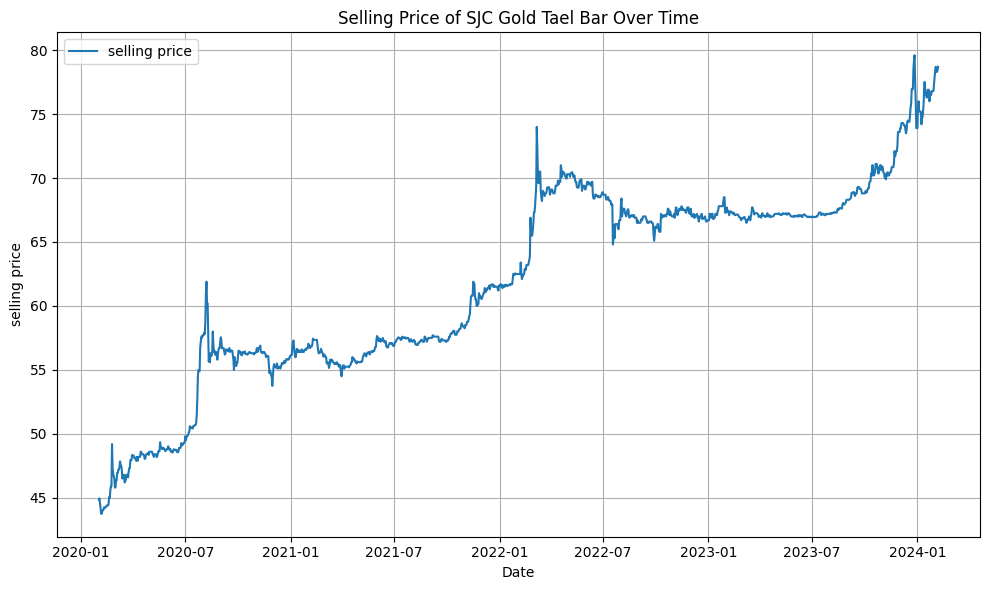

In [30]:
# Plot the target column of each dataframe
plt.figure(figsize=(10, 6))

plt.plot(df_full.index, df_full['selling_price'], label='selling price')
# plt.plot(data_validation.index, data_validation[TARGET], label='Validation Data')

plt.xlabel('Date')
plt.ylabel('selling price')
plt.title('Selling Price of SJC Gold Tael Bar Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add selling price trace
fig.add_trace(go.Scatter(x=df_full.index, y=df_full['selling_price'], mode='lines', name='Selling Price'))

# Update layout
fig.update_layout(
    title='Selling Price of SJC Gold Tael Bar Over Time',
    xaxis_title='Date',
    yaxis_title='Selling Price',
    legend=dict(x=0, y=1),
    autosize=False,
    width=800,
    height=600,
    margin=dict(l=40, r=40, t=80, b=40),
    template='plotly_white'
)

# Show plot
fig.show()

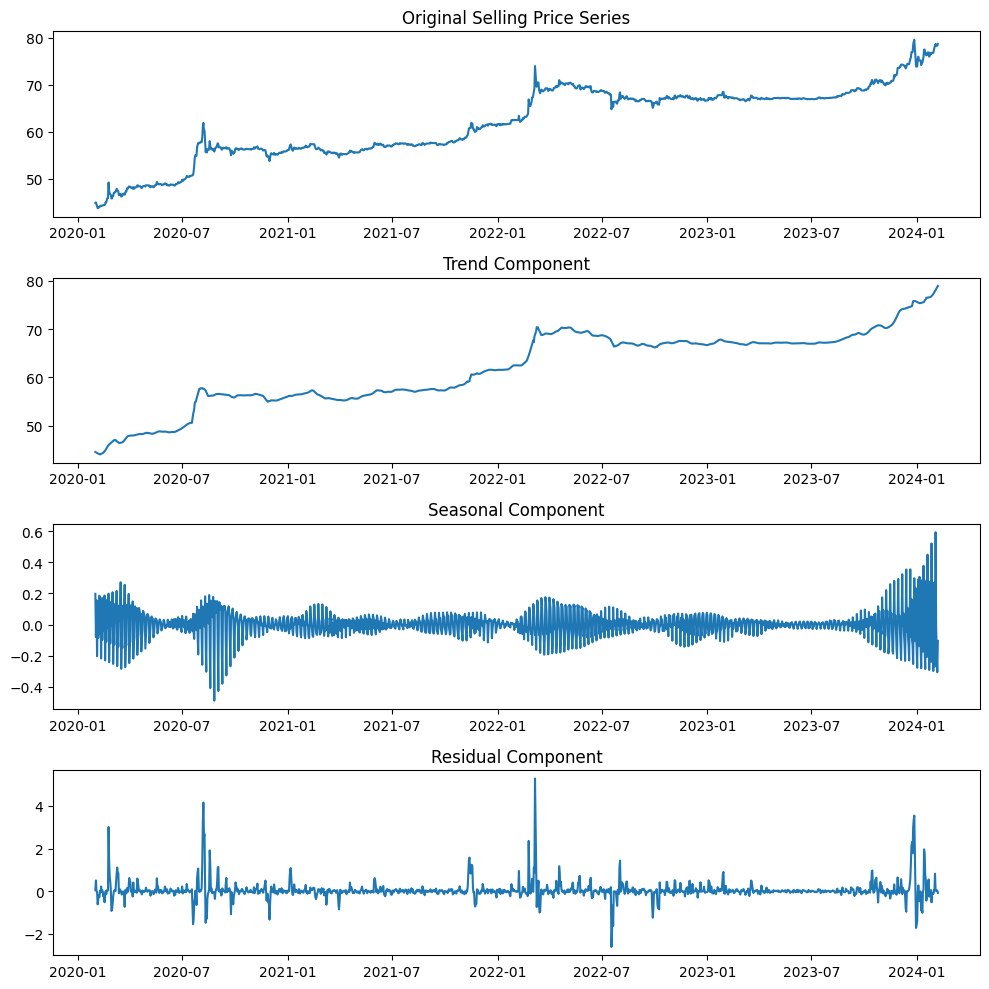

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Assuming df_full is your DataFrame containing the time series data with a column named 'selling_price'
# Replace 'freq' with the frequency of your time series, e.g., 'D' for daily, 'M' for monthly, etc.
# Replace 'period' with the seasonal periodicity, e.g., 7 for weekly seasonality
# Replace 'lo_frac' and 'lo_delta' with the parameters for LOESS smoother
# lo_frac controls the smoothing factor (0.0 < lo_frac < 1.0)
# lo_delta controls the degree of the polynomial used in the LOESS (0 for linear, 1 for quadratic, etc.)
stl = STL(df_full['selling_price'], seasonal=13, robust=True)

# Perform decomposition
res = stl.fit()

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10))
ax1.plot(df_full['selling_price'])
ax1.set_title('Original Selling Price Series')
ax2.plot(res.trend)
ax2.set_title('Trend Component')
ax3.plot(res.seasonal)
ax3.set_title('Seasonal Component')
ax4.plot(res.resid)
ax4.set_title('Residual Component')
plt.tight_layout()
plt.show()


# **Data Splitting**

In [60]:
# Target and exog columns
TARGET = 'selling_price'
EXOGS = df_full.columns.tolist()
EXOGS.remove(TARGET)

In [61]:
# Define constant
WINDOW_SIZE = 31
HORIZON = 31
HOLDOUT_SIZE = 310

In [62]:
# Split data 
data_train = df_full.iloc[: -HORIZON-HOLDOUT_SIZE, :]
data_holdout = df_full.iloc[-HORIZON-HOLDOUT_SIZE:-HORIZON, :]
data_test  = df_full.iloc[-HORIZON:, :]
data_lookback_test = df_full.iloc[-WINDOW_SIZE-HORIZON:, :]
data_validation = df_full.iloc[-HORIZON-HOLDOUT_SIZE-WINDOW_SIZE:-HORIZON-HOLDOUT_SIZE+HORIZON, :]

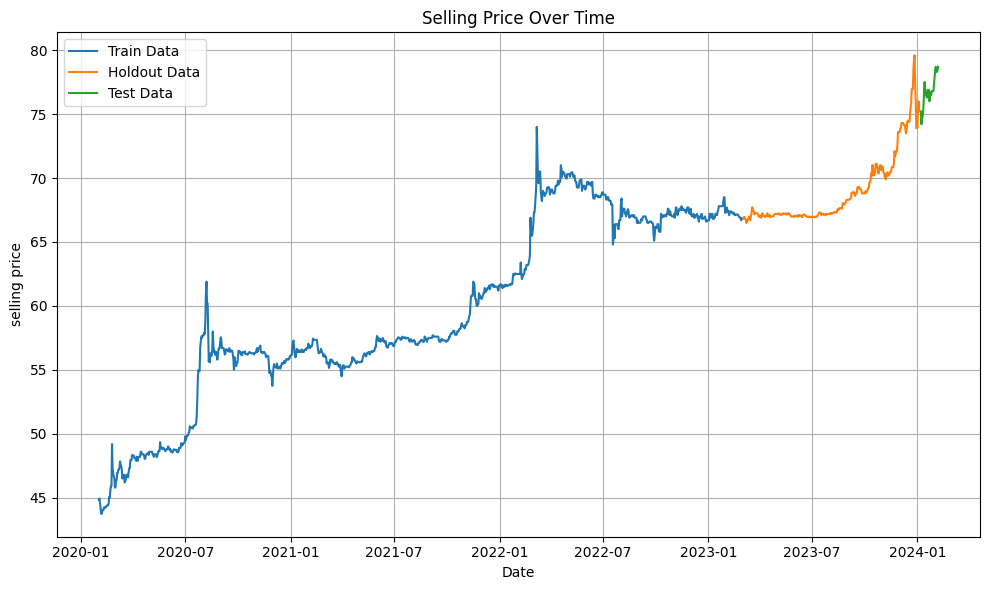

In [63]:
# Plot the target column of each dataframe
plt.figure(figsize=(10, 6))

plt.plot(data_train.index, data_train[TARGET], label='Train Data')
plt.plot(data_holdout.index, data_holdout[TARGET], label='Holdout Data')
plt.plot(data_test.index, data_test[TARGET], label='Test Data')
# plt.plot(data_validation.index, data_validation[TARGET], label='Validation Data')

plt.xlabel('Date')
plt.ylabel('selling price')
plt.title('Selling Price Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
# Create lag feature name list 
lst_col = []
lst_col.append(TARGET)
lst_col = lst_col + EXOGS

feature_name_list = []
for i in range(WINDOW_SIZE, 0, -1):
    feature_name_list += [f'{col}_lag_{str(i)}' for col in lst_col]

feature_name_list

['selling_price_lag_31',
 'purchase_price_lag_31',
 'exchange_rate_lag_31',
 'dayofweek_lag_31',
 'quarter_lag_31',
 'month_lag_31',
 'dayofyear_lag_31',
 'dayofmonth_lag_31',
 'weekofyear_lag_31',
 'SMA_selling_price_7_lag_31',
 'SMA_selling_price_14_lag_31',
 'SMA_selling_price_31_lag_31',
 'Upper_Band_selling_price_20_lag_31',
 'Middle_Band_selling_price_20_lag_31',
 'Lower_Band_selling_price_20_lag_31',
 'purchase_sell_diff_lag_31',
 'converted_xauusd_lag_31',
 'domestic_world_diff_lag_31',
 'selling_price_lag_30',
 'purchase_price_lag_30',
 'exchange_rate_lag_30',
 'dayofweek_lag_30',
 'quarter_lag_30',
 'month_lag_30',
 'dayofyear_lag_30',
 'dayofmonth_lag_30',
 'weekofyear_lag_30',
 'SMA_selling_price_7_lag_30',
 'SMA_selling_price_14_lag_30',
 'SMA_selling_price_31_lag_30',
 'Upper_Band_selling_price_20_lag_30',
 'Middle_Band_selling_price_20_lag_30',
 'Lower_Band_selling_price_20_lag_30',
 'purchase_sell_diff_lag_30',
 'converted_xauusd_lag_30',
 'domestic_world_diff_lag_30',


# **Simple Model**

In [ ]:
# Random Forest Regression model with default hyperparameter values
simple_metric_res, simple_result, simple_model = run_rfr_full(
    data_train=data_train, 
    data_test=data_validation, 
    target_column=TARGET, 
    exog_column=EXOGS, 
    window_size=31, 
    horizon=31, 
    rfr_params=None
)

In [ ]:
# Display results of error metrics 
simple_metric_res

In [ ]:
# Plot the forecast values 
plot_forecast(
    df_result=simple_result, 
    actual_column='selling_price', 
    forecast_column='Forecast', 
    labels=['Actual Values', 'Forecast Values']
)

In [ ]:
# Plot feature importance 
plot_feature_importance(
    model=simple_model, 
    n_limit=5, 
    target_column=TARGET, 
    exog_columns=EXOGS, 
    window_size=31
)

# **Tuning**

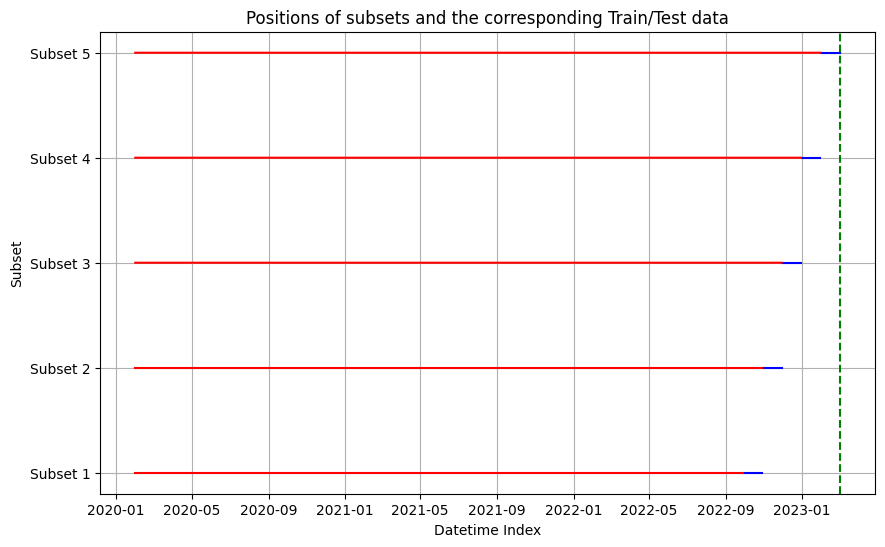

In [42]:
# Plot k fold position
n_fold = 5
test_size = 31
plot_kfold(data_train, n_fold, test_size, title='Positions of subsets and the corresponding Train/Test data')

In [ ]:
# Define search space for hyperparameters
param_distributions = {
  'lookback_window': [31],
  'n_estimators': [100, 200, 300, 400, 500, 600, 800],
  'max_depth': [None, 5, 7, 10, 20],
  'min_samples_split': [2, 3, 5, 10, 12],
  'min_samples_leaf': [1, 2, 3, 4, 6],
  'bootstrap': [True, False]
}

# Perform hyperparameter tuning using random search 
result_df = cv_rfr(
    train_df=data_train,
    target_column=TARGET,
    exog_columns=EXOGS,
    horizon=HORIZON,
    n_folds=5,
    param_grid=param_distributions,
    eval_metric='mae',
    method='random search',
    n_iter=5,
    return_result=True
)

# Save results of hypeparameter tuning stage to a dataframe 
result_df.to_csv(f"tuning_rfr_results.csv")

# **Tuned Model**

In [66]:
# Tuned params
tuned_window = 31
tuned_params = {
    'n_estimators': 300, 
    'max_depth': 7, 
    'min_samples_split': 3, 
    'min_samples_leaf': 1, 
    'bootstrap': True
}

In [ ]:
# Train Random Forest Regression with optimal combination of hyperparameters 
tuned_metric_result, tuned_result, tuned_model= run_rfr_full(
    data_train=data_train, 
    data_test=data_validation, 
    target_column=TARGET, 
    exog_column=EXOGS, 
    window_size=tuned_window, 
    horizon=HORIZON, 
    rfr_params=tuned_params
)

In [ ]:
# Display values of error metrics
tuned_metric_result

In [ ]:
# Plot forecasted values
plot_forecast(
    df_result=tuned_result, 
    actual_column='selling_price', 
    forecast_column='Forecast', 
    labels=['Actual Values', 'Forecast Values']
)

In [ ]:
# Plot feature importance
plot_feature_importance(
    model=tuned_model, 
    n_limit=5, 
    target_column=TARGET, 
    exog_columns=EXOGS, 
    window_size=31
)

# **Holdout Forecast**

In [48]:
# New df containing both training data (used as inputs) to forecast into the holdout set 
data_holdout_rolling = df_full[:-HORIZON]

In [49]:
# test
len(data_holdout_rolling) == len(data_train) + len(data_holdout)
# True

True

In [50]:
# test
print(data_holdout.head(1).index)
print(data_holdout.tail(1).index)
print(data_holdout.shape)

DatetimeIndex(['2023-03-03'], dtype='datetime64[ns]', name='date', freq='D')
DatetimeIndex(['2023-12-06'], dtype='datetime64[ns]', name='date', freq='D')
(279, 18)


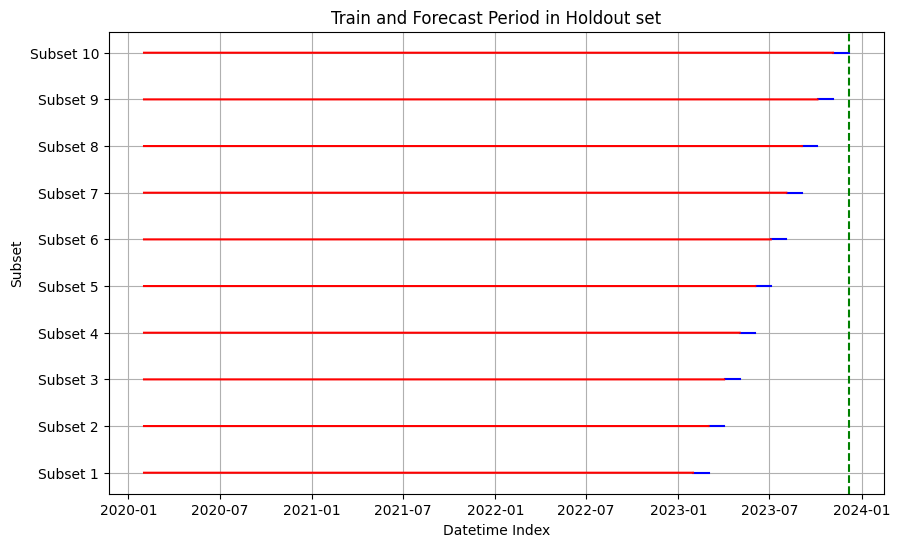

In [70]:
# Plot k fold position
n_fold = 10
test_size = 31
plot_kfold(data_holdout_rolling, n_fold, test_size, 'Train and Forecast Period in Holdout set')

In [ ]:
repeat_time = 10

index = []
forecast_values = []

for i in range(repeat_time, 0, -1):
    
    # Define train and test set 
    temp_train_data = data_holdout_rolling[:-HORIZON*i]    
    # Forecast to the future in holdout
    if i > 1:
        temp_forecast_lookback_data = data_holdout_rolling[-HORIZON*i-WINDOW_SIZE:-HORIZON*i+HORIZON]
    else:
        temp_forecast_lookback_data = data_holdout_rolling[-HORIZON*i-WINDOW_SIZE:]
        
    # Refit the model and make forecast 
    holdout_metric_res, holdout_result, holdout_model= run_rfr_full(
       data_train=temp_train_data, 
       data_test=temp_forecast_lookback_data, 
       target_column=TARGET, 
       exog_column=EXOGS, 
       window_size=WINDOW_SIZE, 
       horizon=HORIZON, 
       rfr_params=tuned_params
    )
    
    index += holdout_result.index.tolist()
    forecast_values += holdout_result['Forecast'].values.tolist()


In [ ]:
# save to dictionary 
holdout_result_dict = {
    'index': index,
    'forecast_values_rfr': forecast_values
}

df_holdout_result = pd.DataFrame(holdout_result_dict)
df_holdout_result = df_holdout_result.set_index('index')


In [ ]:
# Plot forecasts on Holdout set and actual values 
plt.figure(figsize=(10, 6))

plt.plot(df_holdout_result.index, df_holdout_result['forecast_values_rfr'], label='Holdout Forecast')
plt.plot(data_holdout.index, data_holdout['selling_price'], label='Actual Holdout')

plt.title('Holdout forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Selling Price')
plt.legend()
plt.grid(True)

plt.show()

# **Test Period Forecast**

In [71]:
# Data train to make forecast 
data_train_refit = df_full[:-HORIZON]

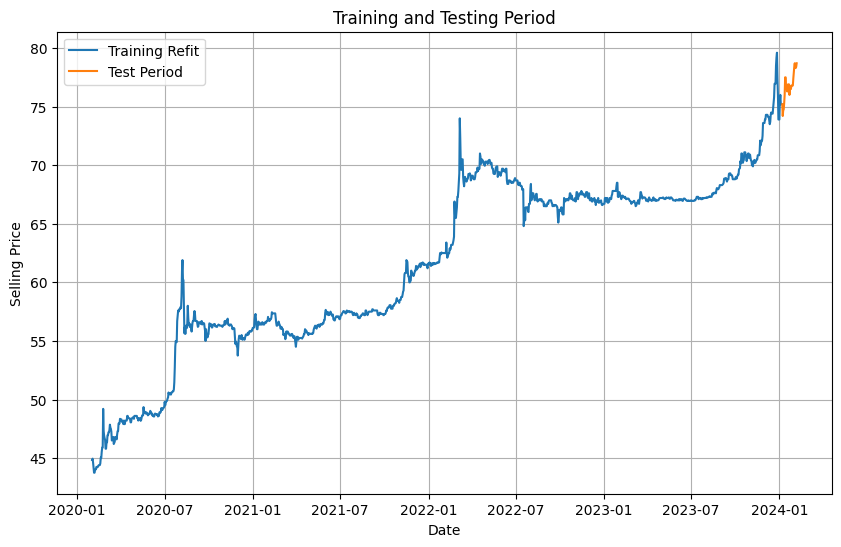

In [72]:
# Plot the training period and testing period 
plt.figure(figsize=(10, 6))

plt.plot(data_train_refit.index, data_train_refit['selling_price'], label='Training Refit')
plt.plot(data_test.index, data_test['selling_price'], label='Test Period')
# plt.plot(data_lookback_test.index, data_lookback_test['selling_price'], label='Lookback Test Period')

plt.title('Training and Testing Period')
plt.xlabel('Date')
plt.ylabel('Selling Price')
plt.legend()
plt.grid(True)

plt.show()

In [73]:
# Refit the model using training and holdout data and make forecast on Test set
test_metric_result, test_result, test_model= run_rfr_full(
       data_train=data_train_refit, 
       data_test=data_lookback_test, 
       target_column=TARGET, 
       exog_column=EXOGS, 
       window_size=WINDOW_SIZE, 
       horizon=HORIZON, 
       rfr_params=tuned_params
    )

x shape: (1375, 558)
y shape: (1375, 31)
x shape: (1, 558)
y shape: (1, 31)


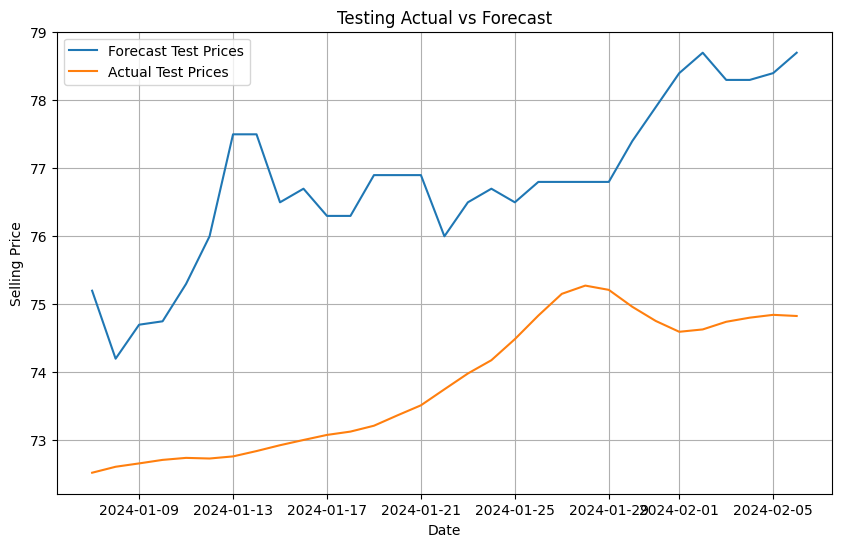

In [74]:
# Plot
plt.figure(figsize=(10, 6))

plt.plot(test_result.index, test_result['selling_price'], label='Forecast Test Prices')
plt.plot(test_result.index, test_result['Forecast'], label='Actual Test Prices')
# plt.plot(data_lookback_test.index, data_lookback_test['selling_price'], label='Lookback Test Period')

plt.title('Testing Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Selling Price')
plt.legend()
plt.grid(True)

plt.show()

In [75]:
# Display values of error metrics
test_metric_result

{'mae': 2.9611476828534373,
 'rmse': 3.091968353913399,
 'mape': 3.8463253628899103,
 'smape': 3.928447366319903,
 'forecast_bias': -2.9611476828534604}

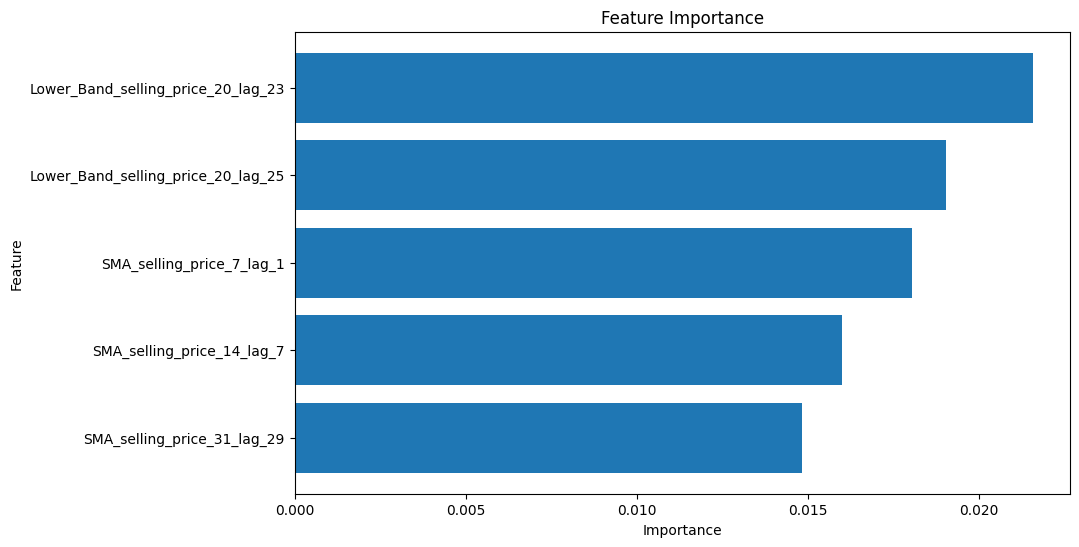

In [76]:
# Feature importance 
plot_feature_importance(
    model=test_model, 
    n_limit=5, 
    target_column=TARGET, 
    exog_columns=EXOGS, 
    window_size=31
)

In [77]:
# Export result to dataframe
test_predictions_to_dict = test_result.reset_index()
dict_test_forecast = {
    'index': test_predictions_to_dict['date'].tolist(),
    'forecast_values_rfr': test_result['Forecast'].tolist()
}

df_test_forecast = pd.DataFrame(
    dict_test_forecast
)

# **Save Forecast**

In [ ]:
# Save holdout forecast values
df_holdout_result.to_csv(f'..//results//randomforest_holdout_forecast.csv')

In [ ]:
# Save test forecast values
df_test_forecast.to_csv(f'..//results//randomforest_test_forecast.csv')